[-0.  0.  0. -0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0.
 -0. -0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0.  0.
  0. -0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0.  0. -0.
  0. -0.  0.  0. -0.  0.]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
1
0.988758463818022
2
0.43631332337132706
3
0.6391650914254763
4
0.2649690164175304
5
0.8685856805163028
6
0.6397104094698327
7
0.41273241551752976
8
0.3678142114272599
9
0.3604334968381227
10
0.36043349683812254
11
0.3678142114272599
12
0.41273241551752865
13
0.639710409469822
14
0.8685856805163099
15
0.2649690164175304
16
0.6391650914254855
17
0.43631332337134876
18
0.9887584638180302


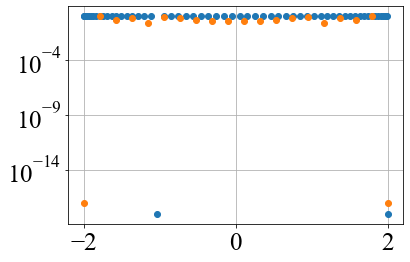

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la
import math,cmath
from scipy.sparse import diags
n=60;#laatice sites
no=50;#bath lattice point
lamba = 0.0
b = (1+np.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn = [1.0, 1.0, 0.0]
to = 3.0 #bath tunneling potential
t = 1.0 #system hopping
sitepotential = np.zeros(n)
siteindx = np.array(range(1, n+1))
sitepotential = 2*lamba*np.cos(2*np.pi*b*(siteindx))
print(sitepotential)
diagonals = [sitepotential,t*np.ones(n-1), t*np.ones(n-1)]
offset = [0,-1,1]
sys_Ham = diags(diagonals,offset,dtype='complex_').toarray()
eigvals, eigvecs = la.eig(sys_Ham)
energyval = (eigvals.real)
def Rand(start, end, num):
    res = []
 
    for j in range(num):
        res.append(random.uniform(start, end))
 
    return res
def rnger(number,epsion):
    mat = []
    mat.append(number + epsion)
    mat.append(number - epsion)
    return mat
def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat = np.zeros((n,n),dtype = 'complex_')
    mat[site,site] =  -2*((gamma**2/(2*to**2))*(energy - np.sqrt(4*to**2-energy**2)*1j)).imag
    return mat
def ret_gre(energy):   
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(n-1):
        mat[i, i] = (energy - sitepotential[i]) / t
    for i in range(3):
        temp = ((sitegammastrn[i]**2/(2*to**2))*(energy  - np.sqrt(4*to**2-energy**2)*1j))
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotential[i] - temp)/t
    return (np.linalg.inv(mat)/t)
def adv_gre(energy):
    return np.transpose(np.conjugate(ret_gre(energy)))
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre(energy)
    mat = np.dot(np.dot(spcdn1,retgre),np.dot(spcdn2,advgre))
    return np.trace(mat)
def makeeigran(eigvals, epsion, number):
    temp = []
    mat = []
    for i in range(len(eigvals)):
        temp.append(Rand(rnger(eigvals[i],epsion)[0],rnger(eigvals[i],epsion)[1],number))
    for k in range(len(eigvals)):
        for l in range(number):
            mat.append(temp[k][l])
    
    return mat
def makelist(pointer):
    moin = []
    for i in range(len(pointer)):
        moin.append(pointer[i])
    return moin
free_energy = makeeigran(energyval, 0.1, 3)
free_energy = makelist(energyval)
mat = np.zeros(len(free_energy), dtype = float)
num = np.zeros(len(free_energy), dtype = float)
for i in range(1,len(free_energy)-1):
    print(i)
    fe = free_energy[i]
    rl = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[0],sitegammastrn[0],fe).real
    nr = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[1],sitegammastrn[1],fe).real
    nl = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[0],sitegammastrn[0],fe).real
    rn = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[2],sitegammastrn[2],fe).real
    if nr + nl == 0:
        mat[i] = rl
    else:
        mat[i] = (rl+(rn*nl)/(nr+nl))
for j in range(len(mat)):
    if mat[j]>1.0E-18:
        num[j]= mat[j] 
    else:
        num[j] = 1.0E-18
plt.plot(free_energy,num,'o')
#print(free_energy)
free_energy = np.linspace(start=-2.0*t,stop=2.0*t,endpoint=True,num=20)
mat = np.zeros(len(free_energy), dtype = float)
num = np.zeros(len(free_energy), dtype = float)
for i in range(1,len(free_energy)-1):
    print(i)
    fe = free_energy[i]
    rl = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[0],sitegammastrn[0],fe).real
    nr = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[1],sitegammastrn[1],fe).real
    nl = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[0],sitegammastrn[0],fe).real
    rn = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[2],sitegammastrn[2],fe).real
    if nr + nl == 0:
        mat[i] = rl
    else:
        mat[i] = (rl+(rn*nl)/(nr+nl))
    print(mat[i])
for j in range(len(mat)):
    if mat[j]>1.0E-18:
        num[j]= mat[j] 
    else:
        num[j] = 10E-18
plt.plot(free_energy,num,'o')
plt.yscale('log')
plt.grid()
plt.show()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198


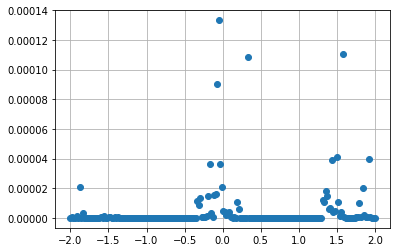

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math,cmath
from scipy.sparse import diags
n=200;#laatice sites
no=100;#bath lattice point
lamba = 0.5
b = (1+np.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn = [1.0, 1.0, 0.0]
to = 3.0 #bath tunneling potential
t = 1.0 #system hopping
sitepotential = np.zeros(n)
siteindx = np.array(range(1, n))
sitepotential = 2*lamba*np.cos(2*np.pi*b*(siteindx))

def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat = np.zeros((n,n),dtype = 'complex_')
    mat =  -2*((gamma**2/(2*to**2))*(energy - np.sqrt(4*to**2-energy**2)*1j)).imag
    return mat
def ret_gre(energy):   
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(n-1):
        mat[i, i] = (energy - sitepotential[i]) / t
    for i in range(3):
        temp = ((sitegammastrn[i]**2/2*to**2)*(energy  - np.sqrt(4*to**2-energy**2)*1j))
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotential[i] - temp)/t
    return (np.linalg.det(mat)/t)
def adv_gre(energy):
    return np.transpose(np.conjugate(ret_gre(energy)))
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre(energy)
    mat = spcdn1*spcdn2/(ret_gre(energy)**2)
    return abs(mat)
free_energy = np.linspace(start=-2.0*t,stop=2.0*t,endpoint=True,num=200)
mat = np.zeros(len(free_energy), dtype = float)
for i in range(1,len(free_energy)-1):
    print(i)
    fe = free_energy[i]
    rl = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[0],sitegammastrn[0],fe).real
    nr = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[1],sitegammastrn[1],fe).real
    nl = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[0],sitegammastrn[0],fe).real
    rn = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[2],sitegammastrn[2],fe).real
    if nr + nl == 0:
        mat[i] = rl
    else:
        mat[i] = (rl+(rn*nl)/(nr+nl))
plt.plot(free_energy,mat,'o')
plt.grid()
plt.show()


[1 2 3]
[-0.  0.  0.]
[[0.+0.j 3.+0.j 0.+0.j]
 [3.+0.j 0.+0.j 3.+0.j]
 [0.+0.j 3.+0.j 0.+0.j]]
[-4.24264069e+00  8.35754392e-17  4.24264069e+00]


TypeError: only integer scalar arrays can be converted to a scalar index

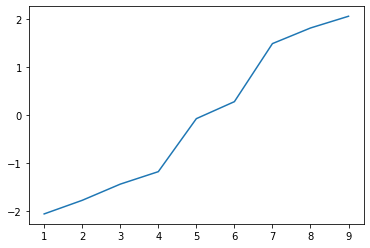

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la
import math,cmath
from scipy.sparse import diags
lamba = 0.0
n = 4
siteindx = np.array(range(1, n))
print(siteindx)
sitepotential = 2*lamba*np.cos(2*np.pi*b*(siteindx))
print(sitepotential)
#system hamiltonian
diagonals = [sitepotential,to*np.ones(n-1), to*np.ones(n-1)]
offset = [0,-1,1]
sys_Ham = diags(diagonals,offset,dtype='complex_').toarray()
print(sys_Ham)
eigvals, eigvecs = la.eig(sys_Ham)
n = (eigvals.real)
print (np.sort(n))
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9],[-2.05630444, -1.77348134, -1.43688086, -1.17739062, -0.07486641,  0.27863018,
  1.48621864,  1.81087702,  2.05519975])
plt.plot(np.array(range(1, n)),np.sort(n))



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math,cmath
from scipy.sparse import diags
n=200;#laatice sites
no=100;#bath lattice point
lamba = 0.5
b = (1+np.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn = [1.0, 1.0, 0.0]
to = 3.0 #bath tunneling potential
t = 1.0 #system hopping
sitepotential = np.zeros(n)
siteindx = np.array(range(1, n))
sitepotential = 2*lamba*np.cos(2*np.pi*b*(siteindx))
#system hamiltonian
diagonals = [sitepotential,to*np.ones(n-1), to*np.ones(n-1)]
offset = [0,-1,1]
sys_Ham = diags(diagonals,offset,dtype='complex_').toarray()
eigvals, eigvecs = la.eig(sys_Ham)

def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat = np.zeros((n,n),dtype = 'complex_')
    mat[site,site] =  -2*((gamma**2/(2*to**2))*(energy - np.sqrt(4*to**2-energy**2)*1j)).imag
    return mat
def ret_gre(energy):   
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(n-1):
        mat[i, i] = (energy - sitepotential[i]) / t
    for i in range(3):
        temp = ((sitegammastrn[i]**2/2*to**2)*(energy  - np.sqrt(4*to**2-energy**2)*1j))
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotential[i] - temp)/t
        print(mat)
    return (np.linalg.inv(mat)/t)
def adv_gre(energy):
    return np.transpose(np.conjugate(ret_gre(energy)))
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre(energy)
    mat = np.dot(np.dot(spcdn1,retgre),np.dot(spcdn2,advgre))
    return np.trace(mat)
free_energy = np.linspace(start=-2.0*t,stop=2.0*t,endpoint=True,num=200)
mat = np.zeros(len(free_energy), dtype = float)
for i in range(1,len(free_energy)-1):
    print(i)
    fe = free_energy[i]
    rl = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[0],sitegammastrn[0],fe).real
    nr = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[1],sitegammastrn[1],fe).real
    nl = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[0],sitegammastrn[0],fe).real
    rn = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[2],sitegammastrn[2],fe).real
    if nr + nl == 0:
        mat[i] = rl
    else:
        mat[i] = (rl+(rn*nl)/(nr+nl))
plt.plot(free_energy,mat,'o')
plt.grid()
plt.show()


In [49]:
def ret_gre(energy):   
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(n-1):
        mat[i, i] = (energy - sitepotential[i]) / t
    for i in range(3):
        temp = ((sitegammastrn[i]**2/2*to**2)*(energy  - np.sqrt(4*to**2-energy**2)*1j))
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotential[i] - temp)/t
print(ret_gre(0))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math,cmath
from scipy.sparse import diags
n=6;#laatice sites
no=4;#bath lattice point
lamba = 0.0
b = (1+np.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn = [1.0, 1.0, 4.0]
to = 2.0 #bath tunneling potential
t = 1.0 #system hopping
sitepotential = np.zeros(n)
siteindx = np.array(range(1, n))
sitepotential = 2*lamba*np.cos(2*np.pi*b*(siteindx))
def ret_gre(energy):   
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(n-1):
        mat[i, i] = (energy - sitepotential[i]) / t
    for i in range(3):
        temp = ((sitegammastrn[i]**2/(2*to**2))*(energy  - (np.sqrt(4*to**2-energy**2))*1j))
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotential[i] - temp)/t
        
    return (mat)
print(ret_gre(1.5))

[[ 1.3125+0.46351241j  1.    +0.j          0.    +0.j
   0.    +0.j          0.    +0.j          0.    +0.j        ]
 [ 1.    +0.j          1.5   +0.j          1.    +0.j
   0.    +0.j          0.    +0.j          0.    +0.j        ]
 [ 0.    +0.j          1.    +0.j          1.5   +0.j
   1.    +0.j          0.    +0.j          0.    +0.j        ]
 [ 0.    +0.j          0.    +0.j          1.    +0.j
  -1.5   +7.41619849j  1.    +0.j          0.    +0.j        ]
 [ 0.    +0.j          0.    +0.j          0.    +0.j
   1.    +0.j          1.5   +0.j          1.    +0.j        ]
 [ 0.    +0.j          0.    +0.j          0.    +0.j
   0.    +0.j          1.    +0.j          1.3125+0.46351241j]]


In [153]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la
import math,cmath
from scipy.sparse import diags
# Function to generate
# and append them
# start = starting range,
# end = ending range
# num = number of
# elements needs to be appended
def Rand(start, end, num):
    res = []
 
    for j in range(num):
        res.append(random.uniform(start, end))
 
    return res
def rnger(number,epsion):
    mat = []
    mat.append(number + epsion)
    mat.append(number - epsion)
    return mat
lamba = 0.0
n = 4
siteindx = np.array(range(0, n))
print(siteindx)
sitepotential = 2*lamba*np.cos(2*np.pi*b*(siteindx))
print(sitepotential)
#system hamiltonian
diagonals = [sitepotential,to*np.ones(n-1), to*np.ones(n-1)]
offset = [0,-1,1]
sys_Ham = diags(diagonals,offset,dtype='complex_').toarray()
print
eigvals, eigvecs = la.eig(sys_Ham)
n = (eigvals.real)
print(n)
def makeeigran(eigvals, epsion, number):
    temp = []
    mat = []
    toi = []
    for i in range(len(eigvals)):
        toi.append(eigvals[i])
        temp.append(Rand(rnger(eigvals[i],epsion)[0],rnger(eigvals[i],epsion)[1],number))
    for k in range(len(eigvals)):
        for l in range(number):
            mat.append(temp[k][l])
    
    return mat
def makelist(pointer):
    moin = []
    for i in range(len(pointer)):
        moin.append(pointer[i])
    return moin
print(makeeigran(n, 0.01, 2))
print(len(makeeigran(n, 0.01, 2)))
print(makelist(n))  

[0 1 2 3]
[ 0. -0.  0.  0.]
[ 4.85410197  1.85410197 -4.85410197 -1.85410197]
[4.858619727235727, 4.8478877459024226, 1.8483196390267036, 1.844693750888811, -4.853153492114727, -4.862931106320865, -1.8562421653312942, -1.852963104694399]
8
[4.854101966249689, 1.8541019662496847, -4.85410196624969, -1.854101966249685]


[[0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 1.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]]
[-1.99975326e+00 -1.99901312e+00 -1.99777975e+00 -1.99605346e+00
 -1.99383467e+00 -1.99112393e+00 -1.98792191e+00 -1.98004732e+00
 -1.97537668e+00 -1.97021865e+00 -1.96457450e+00 -1.95844562e+00
 -1.95183352e+00 -1.94473984e+00 -1.87088806e+00 -1.88176154e+00
 -1.89217072e+00 -1.90211303e+00 -1.91158603e+00 -1.92911484e+00
 -1.92058737e+00 -1.84775907e+00 -1.82280655e+00 -1.80965410e+00
 -1.79605515e+00 -1.78201305e+00 -1.76753126e+00 -1.83550925e+00
 -1.73726303e+00 -1.70528033e+00 -1.68865585e+00 -1.67161472e+00
 -1.65416115e+00 -1.63629943e+00 -1.54102649e+00 -1.52081193e+00
 -1.50022214e+00 -1.47926219e+00 -1.32262373e+00 -1.34602503e+00
 -1.36909421e+00 -1.39182559e+00 -1.41421356e+00  

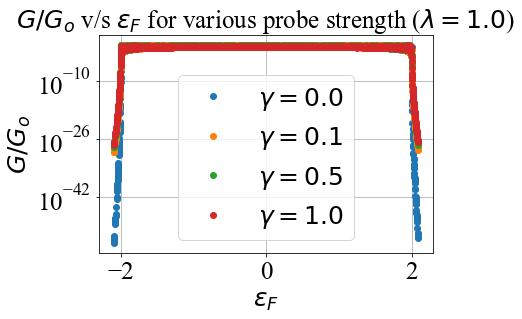

In [7]:
#AAH extended
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la
import math,cmath
from scipy.sparse import diags
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

SMALL_SIZE = 25
MEDIUM_SIZE = 25
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
#Creating the spectral density matrix
n=200;#laatice sites
no=100;#bath lattice point
b = (1+np.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn0 = [1.0,1.0,0.0]
sitegammastrnlow = [1.0,1.0,0.1]
sitegamaastrnhigher = [1.0,1.0,0.5]
sitegammastrn = [1.0, 1.0, 1.0]
arrayofsitegamstrn = [sitegammastrn0, sitegammastrnlow, sitegamaastrnhigher, sitegammastrn]
to = 3.0 #bath tunneling potential
t = 1.0 #system hopping
lamba = 0.0
alpha = 0.0
#sitepotential = 0.0;#bath site potential(constant)
siteindx = np.array(range(1, n))
sitepotentialAAH = 2*lamba*np.cos(2*np.pi*b*(siteindx))/(1+alpha*np.cos(2*np.pi*b*(siteindx)))
diagonals = [sitepotentialAAH,t*np.ones(n-1), t*np.ones(n-1)]
offset = [0,-1,1]
sys_Ham = diags(diagonals,offset,dtype='complex_').toarray()
print(sys_Ham)
eigvals, eigvecs = la.eig(sys_Ham)
energyval = (eigvals.real)
print(energyval)
def Rand(start, end, num):
    res = []
 
    for j in range(num):
        res.append(random.uniform(start, end))
 
    return res
def rnger(number,epsion):
    mat = []
    mat.append(number + epsion)
    mat.append(number - epsion)
    return mat
def makeeigran(eigvals, epsion, number):
    temp = []
    mat = []
    for i in range(len(eigvals)):
        temp.append(Rand(rnger(eigvals[i],epsion)[0],rnger(eigvals[i],epsion)[1],number))
    for k in range(len(eigvals)):
        for l in range(number):
            mat.append(temp[k][l])
    
    return mat
def makelist(pointer):
    moin = []
    for i in range(len(pointer)):
        moin.append(pointer[i])
    return moin
def selfenergy(gamma,energy):
    mat = ((gamma**2)/(2*to**2))*(energy - np.sqrt(4*to**2-energy**2)*1j)
    return mat
def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat = np.zeros((n,n),dtype = 'complex_')
    mat[site,site] = -2*(selfenergy(gamma,energy).imag)
    return mat
#Green's functions
def ret_gre(energy, arraysitgamstrn):
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(n-1):
        mat[i, i] = (energy - sitepotentialAAH[i]) / t
    for i in range(3):
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotentialAAH[i] - selfenergy(arraysitgamstrn[i],energy))/t
    return (np.linalg.inv(mat)/t)


def adv_gre(energy, arraysitegamstrn):
    return np.transpose(np.conjugate(ret_gre(energy, arraysitegamstrn)))

#transmission probability
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy, arraysitegamstrn):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy, arraysitegamstrn)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    advgre = adv_gre(energy, arraysitegamstrn)
    mat = np.matmul(np.matmul(spcdn1,retgre),np.matmul(spcdn2,advgre))
    return np.trace(mat)
free_energy = makeeigran(energyval, 0.1, 10) + makelist(energyval)
for sgstrn in arrayofsitegamstrn:
    print(sgstrn)
    mat = np.zeros(len(free_energy), dtype = float)
    for i in range(1,len(free_energy)-1):
        print(i)
        fe = free_energy[i]
        rl = trnasmission(sitegammaindx[1],sgstrn[1],sitegammaindx[0],sgstrn[0],fe, sgstrn).real
        nr = trnasmission(sitegammaindx[2],sgstrn[2],sitegammaindx[1],sgstrn[1],fe, sgstrn).real
        nl = trnasmission(sitegammaindx[2],sgstrn[2],sitegammaindx[0],sgstrn[0],fe, sgstrn).real
        rn = trnasmission(sitegammaindx[1],sgstrn[1],sitegammaindx[2],sgstrn[2],fe, sgstrn).real
        if nr + nl == 0:
            mat[i] = rl
        else:
            mat[i] = (rl+(rn*nl)/(nr+nl))
    #plot = [m if m>1.0E-18 else 0 for m in mat]
    plt.plot(free_energy, mat,'o',label =  f'$\gamma = {sgstrn[2]}$')
plt.title('$G/G_o$ v/s $\epsilon_{F}$ for various probe strength ($\lambda = 1.0$)')
plt.xlabel('$\epsilon_{F}$')
plt.ylabel('$G/G_o$')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

